In [1]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
import os
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

# for diagramming 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import folium

In [2]:
## load the dataframe from a pickle file 
df = pd.read_pickle('Streamlit/dataframe.pkl')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13412 entries, 1 to 288719
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   13412 non-null  string 
 1   City                                      13412 non-null  string 
 2   AQI Value                                 13412 non-null  int64  
 3   AQI Category                              13412 non-null  string 
 4   CO AQI Value                              13412 non-null  int64  
 5   CO AQI Category                           13412 non-null  string 
 6   Ozone AQI Value                           13412 non-null  int64  
 7   Ozone AQI Category                        13412 non-null  string 
 8   NO2 AQI Value                             13412 non-null  int64  
 9   NO2 AQI Category                          13412 non-null  string 
 10  PM2.5 AQI Value                       

In [8]:
asian_cities = df[df['Continent'] == 'Asia']


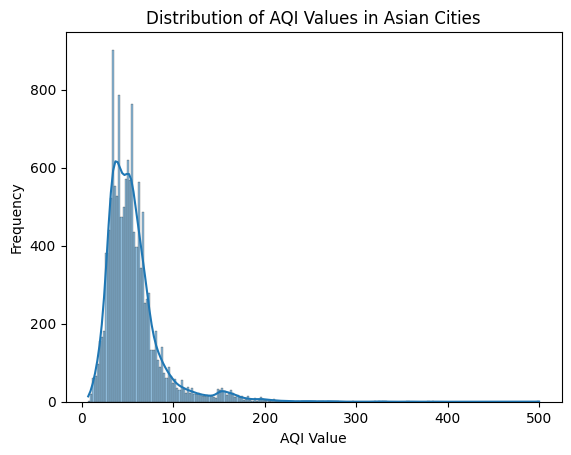

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# AQI distribution for Asian cities
sns.histplot(df['AQI Value'], kde=True)
plt.title('Distribution of AQI Values in Asian Cities')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.show()


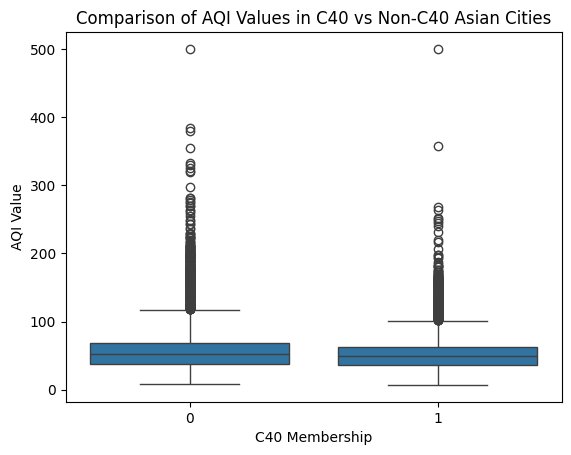

In [22]:
sns.boxplot(x='C40_True', y='AQI Value', data=df)
plt.title('Comparison of AQI Values in C40 vs Non-C40 Asian Cities')
plt.xlabel('C40 Membership')
plt.ylabel('AQI Value')
plt.show()


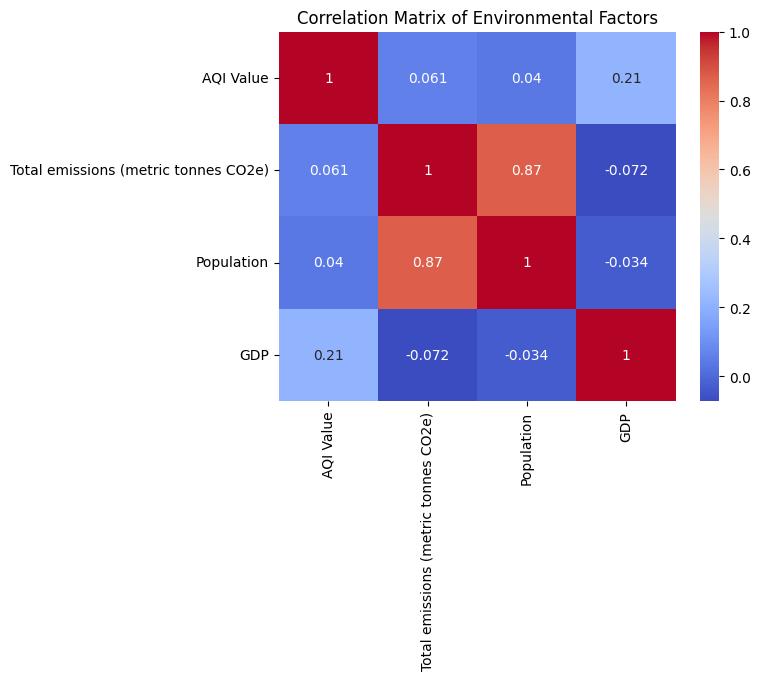

In [23]:
correlation_matrix = df[['AQI Value', 'Total emissions (metric tonnes CO2e)', 'Population', 'GDP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Environmental Factors')
plt.show()


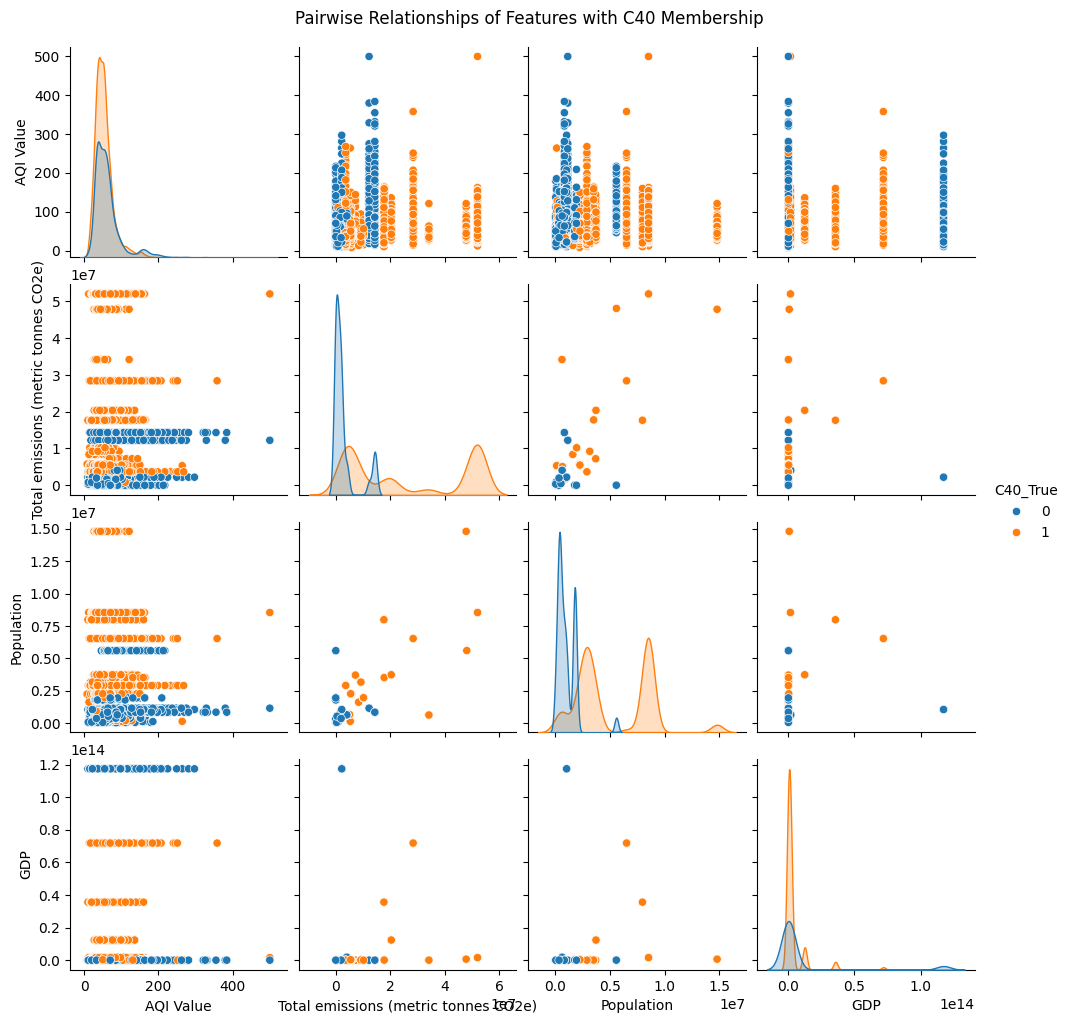

In [24]:
sns.pairplot(df[['AQI Value', 'Total emissions (metric tonnes CO2e)', 'Population', 'GDP', 'C40_True']], hue='C40_True')
plt.suptitle('Pairwise Relationships of Features with C40 Membership', y=1.02)
plt.show()


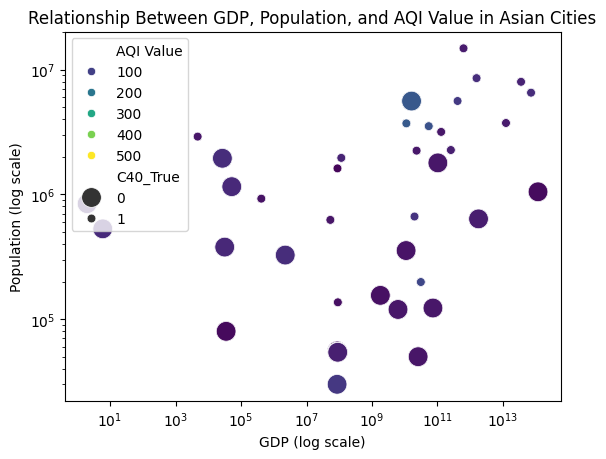

In [25]:
sns.scatterplot(x='GDP', y='Population', data=df, hue='AQI Value', size='C40_True', palette='viridis', sizes=(40, 200))
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship Between GDP, Population, and AQI Value in Asian Cities')
plt.xlabel('GDP (log scale)')
plt.ylabel('Population (log scale)')
plt.legend(loc='upper left')
plt.show()


In [26]:
# Filter the dataset for cities in Asia and extract relevant features
asia_data = df[['AQI Value','Population','GDP', 'C40_True']]

# Features and target variable
X = asia_data[['AQI Value', 'Population', 'GDP']]
y = asia_data['C40_True']


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")


Accuracy: 0.6194558330227358
Precision: 0.6083621020329881
Recall: 1.0
ROC-AUC: 0.5346399270738378
